In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
students_df = pd.read_csv(r"C:\Users\Rupa Gupta\Documents\zylen\students.csv", encoding= 'unicode_escape')
course_activity_df = pd.read_csv(r"C:\Users\Rupa Gupta\Documents\zylen\course_activity.csv",encoding= 'unicode_escape')
feedback_df = pd.read_csv(r"C:\Users\Rupa Gupta\Documents\zylen\feedback.csv",encoding= 'unicode_escape')

In [12]:
students_df.shape

(100, 6)

In [13]:
course_activity_df.shape

(659, 5)

In [14]:
students_df.head()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023


In [16]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [17]:
pd.isnull(students_df).sum()

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

In [24]:
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], format='%d/%m/%Y')
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], format='%d/%m/%Y')

In [5]:
students_df['Age_Group'] = pd.cut(
    students_df['Age'],
    bins=[0, 20, 30, 40, 100],
    labels=['<20', '20-29', '30-39', '40+'],
    right=False,  # Optional: include left edge, exclude right
    include_lowest=True
)

merge dataset

In [7]:
merged_df = pd.merge(course_activity_df, students_df, on="Student_ID")
feedback_merged = pd.merge(feedback_df, course_activity_df, on=["Student_ID", "Course_ID"])

Exploratory Data Analysis 

Average Completion Rate-


In [8]:
avg_completion_rate = course_activity_df["Completion_Percentage"].mean()
print("Average Completion Rate: {:.2f}%".format(avg_completion_rate))

Average Completion Rate: 54.78%


Courses by Engagement Time-

In [9]:
engagement_by_course = course_activity_df.groupby("Course_ID")["Time_Spent_Minutes"].mean()
print("\nHighest Engagement Course:", engagement_by_course.idxmax())
print("Lowest Engagement Course:", engagement_by_course.idxmin())


Highest Engagement Course: DM101
Lowest Engagement Course: PY202


Engagement by Age Group-

In [16]:
engagement_by_age = merged_df.groupby("Age_Group", observed=False)["Time_Spent_Minutes"].mean().fillna(0).astype(int)
print("Engagement by Age Group:", engagement_by_age)

Engagement by Age Group: Age_Group
<20      104
20-29     97
30-39     95
40+        0
Name: Time_Spent_Minutes, dtype: int64


Engagement by Location-

In [18]:
engagement_by_location = merged_df.groupby("Location")["Time_Spent_Minutes"].mean().astype(int)
print("Engagement by Location:", engagement_by_location)

Engagement by Location: Location
Bangalore     98
Chennai       90
Delhi        103
Kolkata      104
Mumbai        95
Name: Time_Spent_Minutes, dtype: int64


Average Feedback Rating per Course-

In [47]:
avg_feedback_rating = feedback_df.groupby("Course_ID")["Rating"].mean()
print("Average Feedback Rating per Course:")
print(avg_feedback_rating.round(2)) 

Average Feedback Rating per Course:
Course_ID
DM101    2.90
PY202    3.28
UX303    2.92
WD404    2.79
Name: Rating, dtype: float64


Correlation: Completion % vs Rating-

In [25]:
correlation = feedback_merged["Completion_Percentage"].corr(feedback_merged["Rating"])
print("Correlation between Completion and Rating: {:.3f}".format(correlation))

Correlation between Completion and Rating: -0.052


Top Student Segments-

In [26]:
student_engagement = course_activity_df.groupby("Student_ID")["Time_Spent_Minutes"].sum()
student_ratings = feedback_df.groupby("Student_ID")["Rating"].mean()
student_segments = pd.DataFrame({
    "Total_Engagement_Min": student_engagement,
    "Avg_Rating": student_ratings
}).dropna().sort_values(by=["Total_Engagement_Min", "Avg_Rating"], ascending=False).head(3)
print("\nTop 3 Student Segments:\n", student_segments)


Top 3 Student Segments:
             Total_Engagement_Min  Avg_Rating
Student_ID                                  
S042                        1329         1.0
S066                        1158         2.0
S077                        1121         5.0


Visualisation

Engagement Patterns by Course-

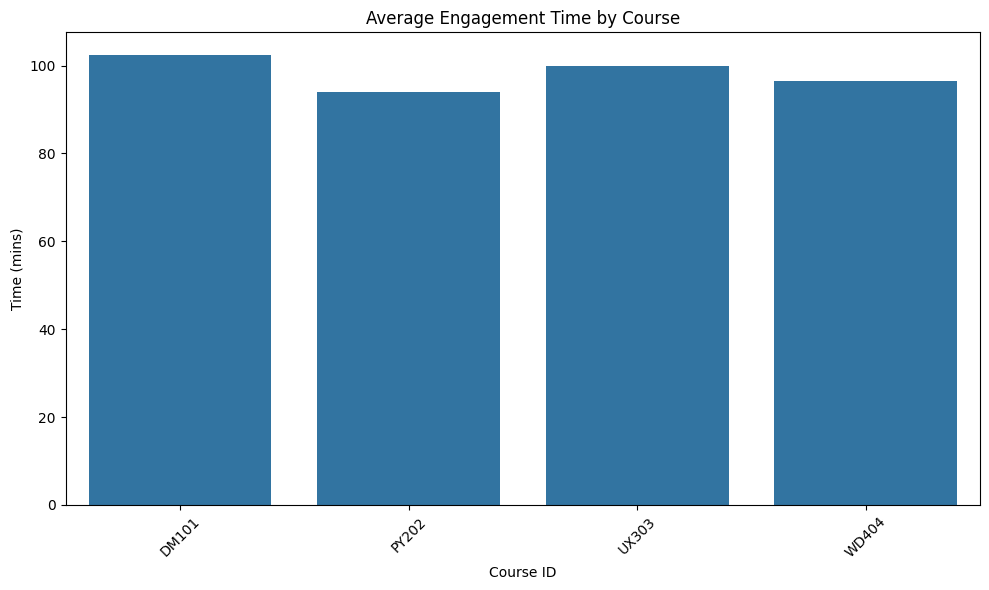

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=engagement_by_course.index, y=engagement_by_course.values)
plt.title("Average Engagement Time by Course")
plt.ylabel("Time (mins)")
plt.xlabel("Course ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Engagement by Age Group (Demographic)

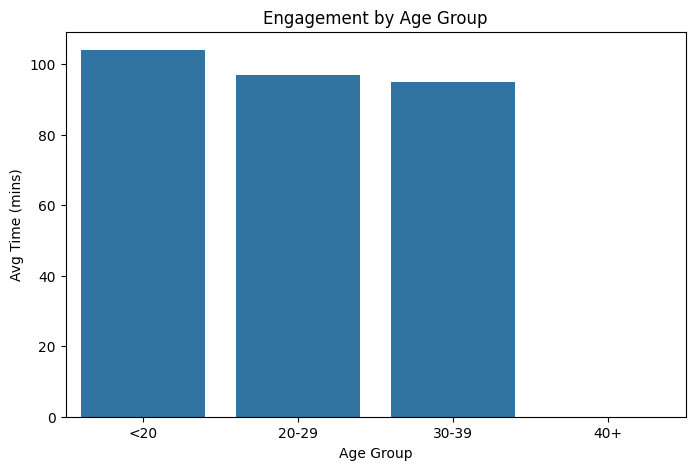

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=engagement_by_age.index, y=engagement_by_age.values)
plt.title("Engagement by Age Group")
plt.ylabel("Avg Time (mins)")
plt.xlabel("Age Group")
plt.show()


Engagement by Location (Demographic)

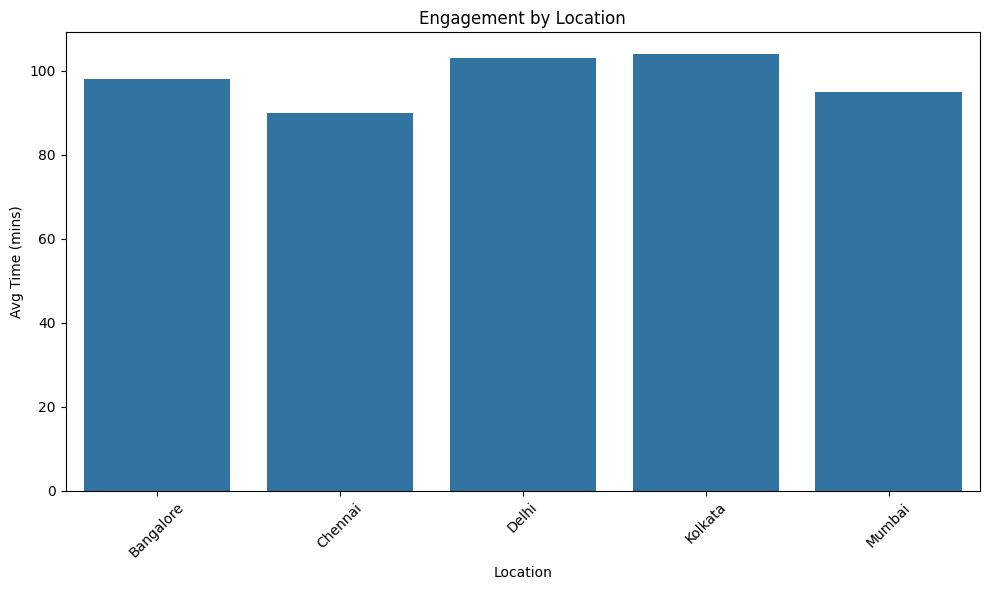

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=engagement_by_location.index, y=engagement_by_location.values)
plt.title("Engagement by Location")
plt.ylabel("Avg Time (mins)")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feedback Ratings Comparison per Course

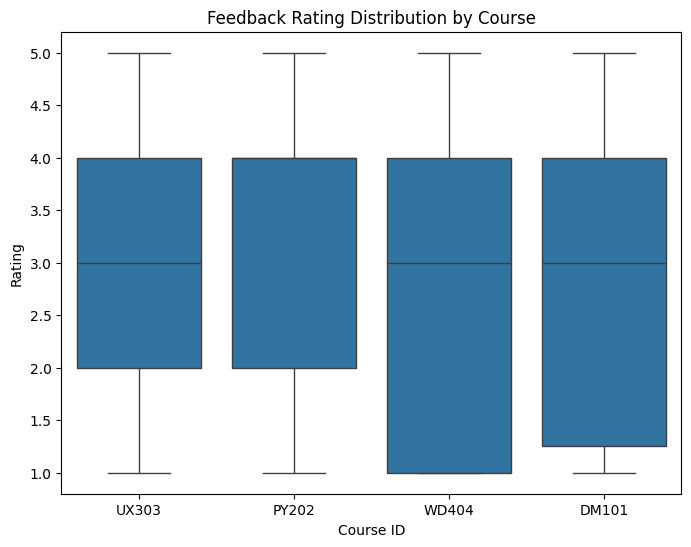

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x=feedback_df['Course_ID'], y=feedback_df['Rating'])
plt.title("Feedback Rating Distribution by Course")
plt.ylabel("Rating")
plt.xlabel("Course ID")
plt.show()

Trend: Completion vs Rating

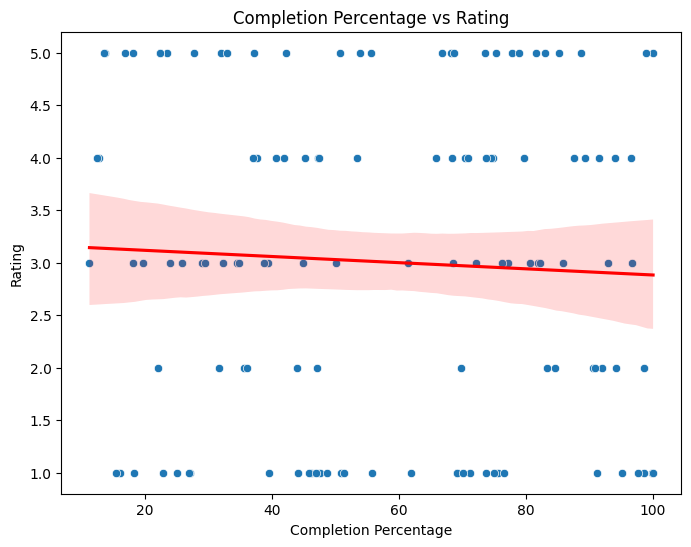

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=feedback_merged, x="Completion_Percentage", y="Rating")
sns.regplot(data=feedback_merged, x="Completion_Percentage", y="Rating", scatter=False, color='red')
plt.title("Completion Percentage vs Rating")
plt.xlabel("Completion Percentage")
plt.ylabel("Rating")
plt.show()
